# Robot Class

In this project, we'll be localizing a robot in a 2D grid world. The basis for simultaneous localization and mapping (SLAM) is to gather information from a robot's sensors and motions over time, and then use information about measurements and motion to re-construct a map of the world.

### Uncertainty

Since robot motion and sensors have some uncertainty associated with them. For example, imagine a car driving up hill and down hill; the speedometer reading will likely overestimate the speed of the car going up hill and underestimate the speed of the car going down hill because it cannot perfectly account for gravity. Similarly, we cannot perfectly predict the *motion* of a robot. A robot is likely to slightly overshoot or undershoot a target location.

In this notebook, we'll look at the `robot` class. First, we'll create a robot and move it around a 2D grid world. Then define a `sense` function for this robot that allows it to sense landmarks in a given world!

In [1]:
# import some resources
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
# the robot class
class robot:

    # --------
    # init: 
    #   creates a robot with the specified parameters and initializes 
    #   the location (self.x, self.y) to the center of the world
    #
    def __init__(self, world_size = 100.0, measurement_range = 30.0,
                 motion_noise = 1.0, measurement_noise = 1.0):
        self.measurement_noise = 0.0
        self.world_size = world_size
        self.measurement_range = measurement_range
        self.x = world_size / 2.0
        self.y = world_size / 2.0
        self.motion_noise = motion_noise
        self.measurement_noise = measurement_noise
        self.landmarks = []
        self.num_landmarks = 0


    # returns a positive, random float
    def rand(self):
        return random.random() * 2.0 - 1.0


    # --------
    # move: attempts to move robot by dx, dy. If outside world
    #       boundary, then the move does nothing and instead returns failure
    #
    def move(self, dx, dy):

        x = self.x + dx + self.rand() * self.motion_noise
        y = self.y + dy + self.rand() * self.motion_noise

        if x < 0.0 or x > self.world_size or y < 0.0 or y > self.world_size:
            return False
        else:
            self.x = x
            self.y = y
            return True
    

    # --------
    # sense: returns x- and y- distances to landmarks within visibility range
    #        because not all landmarks may be in this range, the list of measurements
    #        is of variable length. Set measurement_range to -1 if you want all
    #        landmarks to be visible at all times
    #
    
    def sense(self):
        ''' This function does not take in any parameters, instead it references internal variables
            (such as self.landamrks) to measure the distance between the robot and any landmarks
            that the robot can see (that are within its measurement range).
            This function returns a list of landmark indices, and the measured distances (dx, dy)
            between the robot's position and said landmarks.
            This function should account for measurement_noise and measurement_range.
            One item in the returned list should be in the form: [landmark_index, dx, dy].
            '''
           
        measurements = []
        
        # iterate through all of the landmarks in a world
        for i, landmark in enumerate(self.landmarks):
            # For each landmark
            # 1. compute dx and dy, the distances between the robot and the landmark
            dx = landmark[0] - self.x
            dy = landmark[1] - self.y
            
            # 2. account for measurement noise by *adding* a noise component to dx and dy
            dx += self.rand() * self.measurement_noise
            dy += self.rand() * self.measurement_noise
            
            # 3. If either of the distances, dx or dy, fall outside of the internal var, measurement_range
            #    then we cannot record them; if they do fall in the range, then add them to the measurements list
            if self.measurement_range < 0.0 or (abs(dx) <= self.measurement_range and abs(dy) <= self.measurement_range):
                measurements.append([i, dx, dy])
        
        # return the final, complete list of measurements
        return measurements

    
    # --------
    # make_landmarks: 
    # make random landmarks located in the world
    #
    def make_landmarks(self, num_landmarks):
        self.landmarks = []
        for i in range(num_landmarks):
            self.landmarks.append([round(random.random() * self.world_size),
                                   round(random.random() * self.world_size)])
        self.num_landmarks = num_landmarks
    
    
    # called when print(robot) is called; prints the robot's location
    def __repr__(self):
        return 'Robot: [x=%.5f y=%.5f]'  % (self.x, self.y)

## Define a world and a robot

Next, let's instantiate a robot object. We define a small 10x10 square world, a measurement range that is half that of the world and small values for motion and measurement noise.

In [3]:
world_size         = 10.0    # size of world (square)
measurement_range  = 5.0     # range at which we can sense landmarks
motion_noise       = 0.2      # noise in robot motion
measurement_noise  = 0.2      # noise in the measurements

# instantiate a robot, r
r = robot(world_size, measurement_range, motion_noise, measurement_noise)

# print out the location of r
print(r)

Robot: [x=5.00000 y=5.00000]


## Visualizing the World

A helper visualization function, `display_world`, that will display a grid world in a plot and draw a red `o` at the location of our robot, `r`. The details of how this function wors can be found in the `helpers.py` file in the home directory

Robot: [x=5.00000 y=5.00000]


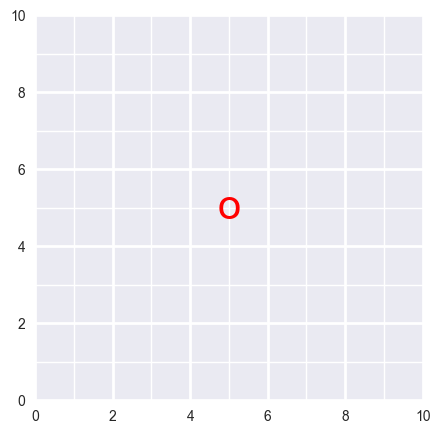

In [4]:
# import helper function
from helpers import display_world

# define figure size
plt.rcParams["figure.figsize"] = (5,5)

# call display_world and display the robot in it's grid world
print(r)
display_world(int(world_size), [r.x, r.y])

## Movement

Next, let's call the robot's `move` function. We'll ask it to move some distance `(dx, dy)` and we'll see that this motion is not perfect by the placement of our robot `o` and by the printed out position of `r`. 

Robot: [x=6.15975 y=6.93336]


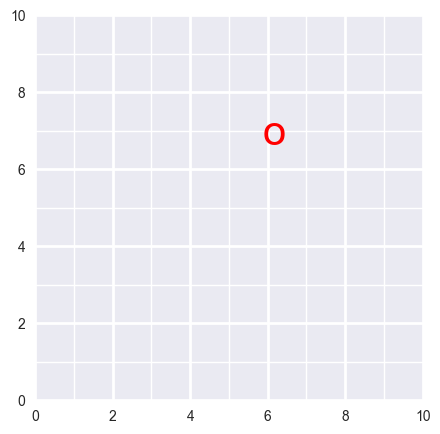

In [5]:
# choose values of dx and dy (negative works, too)
dx = 1
dy = 2
r.move(dx, dy)

# print out the exact location
print(r)

# display the world after movement, not that this is the same call as before
# the robot tracks its own movement
display_world(int(world_size), [r.x, r.y])

## Landmarks

Next, let's create landmarks, which are measurable features in the map. You can think of landmarks as things like notable buildings, or something smaller such as a tree, rock, or other feature.

The robot class has a function `make_landmarks` which randomly generates locations for the number of specified landmarks. We have to pass these locations as a third argument to the `display_world` function and the list of landmark locations is accessed similar to how we find the robot position `r.landmarks`. 

Each landmark is displayed as a purple `x` in the grid world, and we also print out the exact `[x, y]` locations of these landmarks at the end of this cell.

Robot: [x=6.15975 y=6.93336]


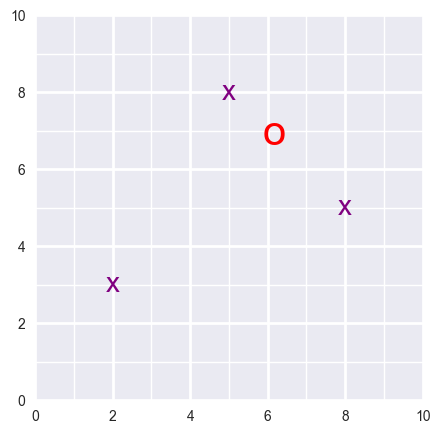

Landmark locations [x,y]:  [[5, 8], [8, 5], [2, 3]]


In [6]:
# create any number of landmarks
num_landmarks = 3
r.make_landmarks(num_landmarks)

# print out our robot's exact location
print(r)

# display the world including these landmarks
display_world(int(world_size), [r.x, r.y], r.landmarks)

# print the locations of the landmarks
print('Landmark locations [x,y]: ', r.landmarks)

## Sense

Once we have some landmarks to sense, we need to be able to tell our robot to *try* to sense how far they are away from it.
The `sense` function uses only internal class parameters and returns a list of the the measured/sensed x and y distances to the landmarks it senses within the specified `measurement_range`

In [ ]:
# try to sense any surrounding landmarks
measurements = r.sense()

print(measurements)

[[0, -1.1395435213985778, 1.1975188906362217], [1, 1.9062753649992268, -1.7610770611726778], [2, -4.222716736793293, -4.103396320742822]]


---
## Data

#### Putting it all together

To perform SLAM, we'll collect a series of robot sensor measurements and motions, in that order, over a defined period of time. Then we'll use only this data to re-construct the map of the world with the robot and landmar locations. You can think of SLAM as peforming what we've done in this notebook, only backwards. Instead of defining a world and robot and creating movement and sensor data, the movement and sensor measurements will reconstruct the world!

`data` is constructed over a series of time steps as follows:

In [8]:
data = []

# after a robot first senses, then moves (one time step)
# that data is appended like so:
data.append([measurements, [dx, dy]])

# for our example movement and measurement
print(data)

[[[[0, -1.1395435213985778, 1.1975188906362217], [1, 1.9062753649992268, -1.7610770611726778], [2, -4.222716736793293, -4.103396320742822]], [1, 2]]]


In [9]:
# in this example, we have only created one time step (0)
time_step = 0

# so you can access robot measurements:
print('Measurements: ', data[time_step][0])

# and its motion for a given time step:
print('Motion: ', data[time_step][1])

Measurements:  [[0, -1.1395435213985778, 1.1975188906362217], [1, 1.9062753649992268, -1.7610770611726778], [2, -4.222716736793293, -4.103396320742822]]
Motion:  [1, 2]
